# Task 2

Import all the necessary packages

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import scipy.stats
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

%matplotlib inline

plt.rcParams['figure.figsize'] = (15, 9)

Load avocado data and check it

Legend:
* Date - date of the observation
* AveragePrice - average price of a single avocado
* Total Volume - total number of avocados sold
* 4046 - total number of avocados with PLU 4046 sold
* 4225 - total number of avocados with PLU 4225 sold
* 4770 - total number of avocados with PLU 4770 sold
* Total Bags
* Small Bags
* Large Bags
* XLarge Bags
* type - conventional or organic
* year
* region




In [226]:
df = pd.read_csv("avocado.csv")

In [227]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [228]:
df = df.drop(columns='Unnamed: 0')

In [229]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [230]:
df.columns = ["date", "average_price", "total_volume", "4046", "4225", "4770", "total_bags", "small_bags", "large_bags", "xlarge_bags", "type", "year", "region"]

In [231]:
df.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [232]:
df.describe()

,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [233]:
df.shape

(18249, 13)

In [234]:
df.groupby("year").count()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,region
year,,,,,,,,,,,,
2015,5615,5615,5615,5615,5615,5615,5615,5615,5615,5615,5615,5615
2016,5616,5616,5616,5616,5616,5616,5616,5616,5616,5616,5616,5616
2017,5722,5722,5722,5722,5722,5722,5722,5722,5722,5722,5722,5722
2018,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296


In [235]:
df = df[~(df.year == 2018)]

In [236]:
df.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [237]:
df.year.value_counts()

2017    5722
2016    5616
2015    5615
Name: year, dtype: int64

### Preparation
I need subsample with 5-10 random variables, at least half of
them should be described with continuous random variable type. Target variable
should be continuous.

In [238]:
subsample_columns = ['average_price', # target
                     'year', # categorical
                     'total_volume',  # predictor
                     '4046', # predictor
                     '4225', # predictor
                     '4770', # predictor
                     'total_bags', # predictor
                     'small_bags', # predictor
                     'large_bags', # predictor
                     'xlarge_bags'] # predictor

predictors = subsample_columns[2:]
categorial = subsample_columns[1]
target = subsample_columns[0]
df = df[subsample_columns]

In [239]:
df.head()

,average_price,year,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags
0,1.33,2015,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0
1,1.35,2015,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0
2,0.93,2015,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0
3,1.08,2015,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0
4,1.28,2015,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0


### Step 1
I need to make a non-parametric estimation of PDF in form of histogram and using
kernel density function for MRV (or probability law in case of discrete MRV).

Let's do it :)

In [240]:
pic_size=10

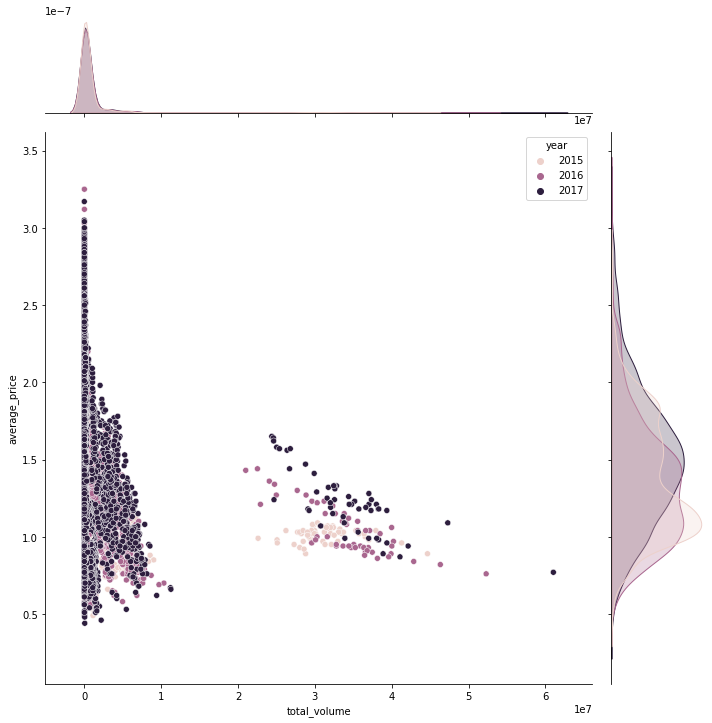

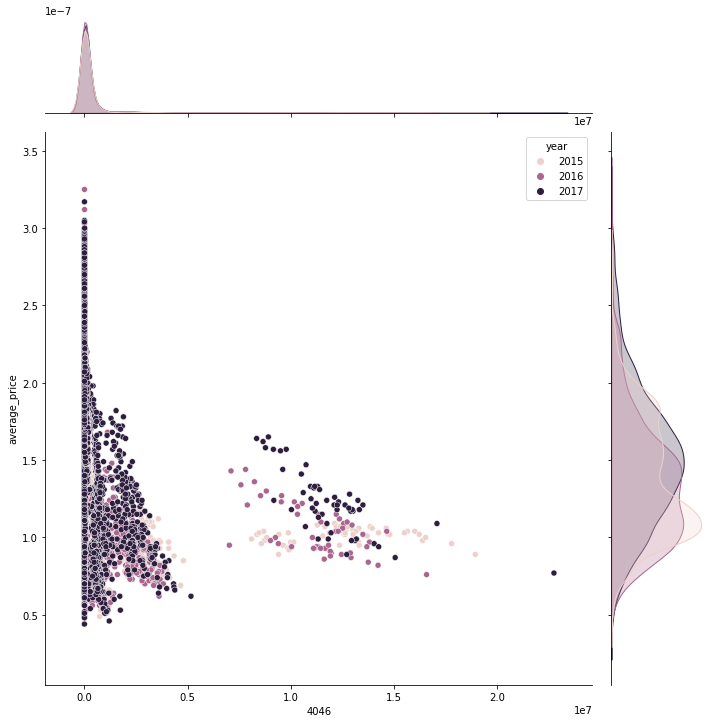

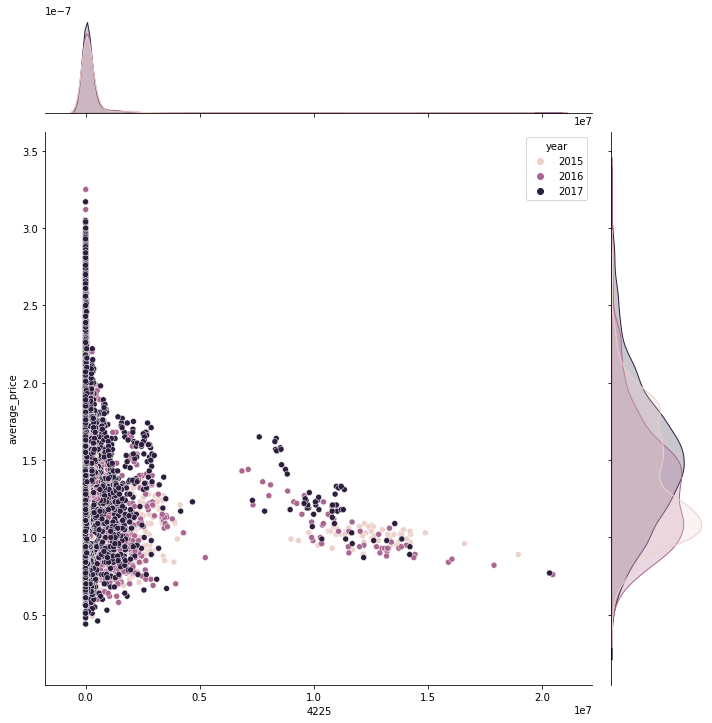

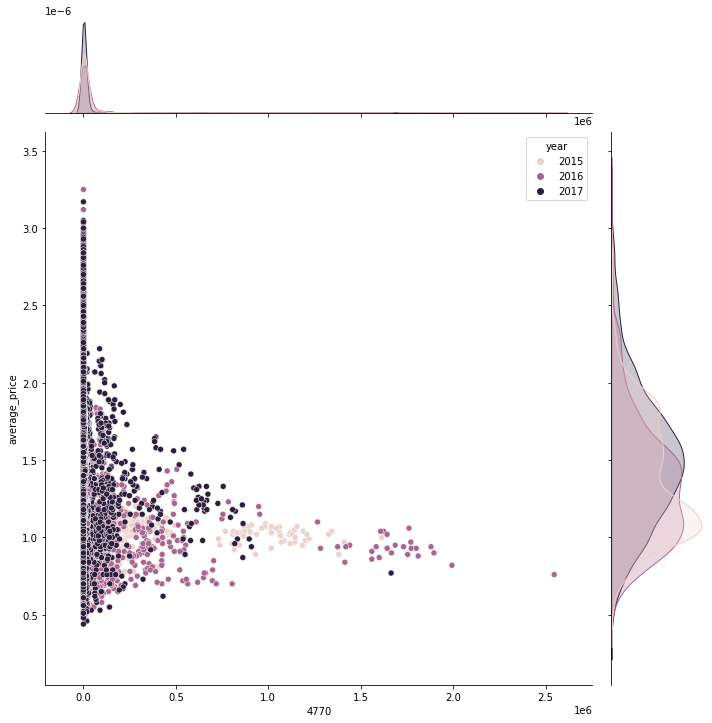

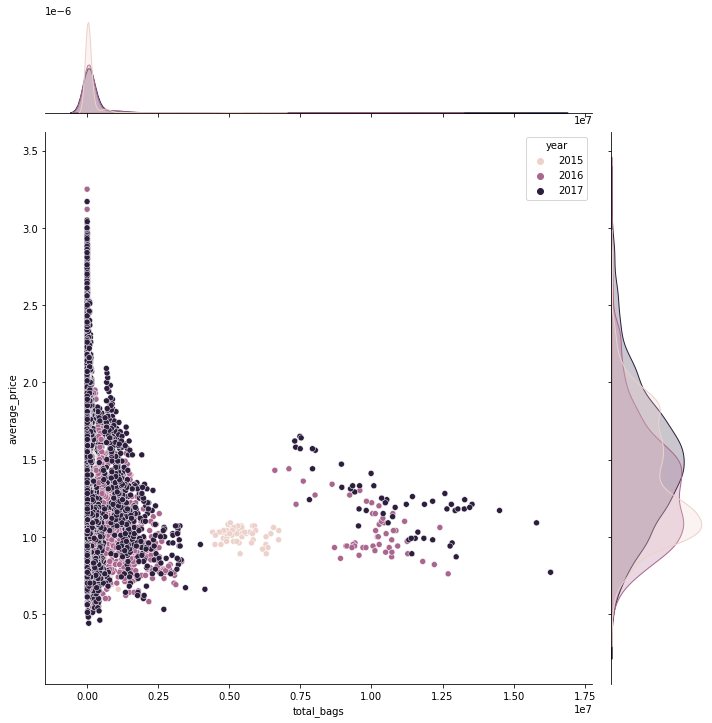

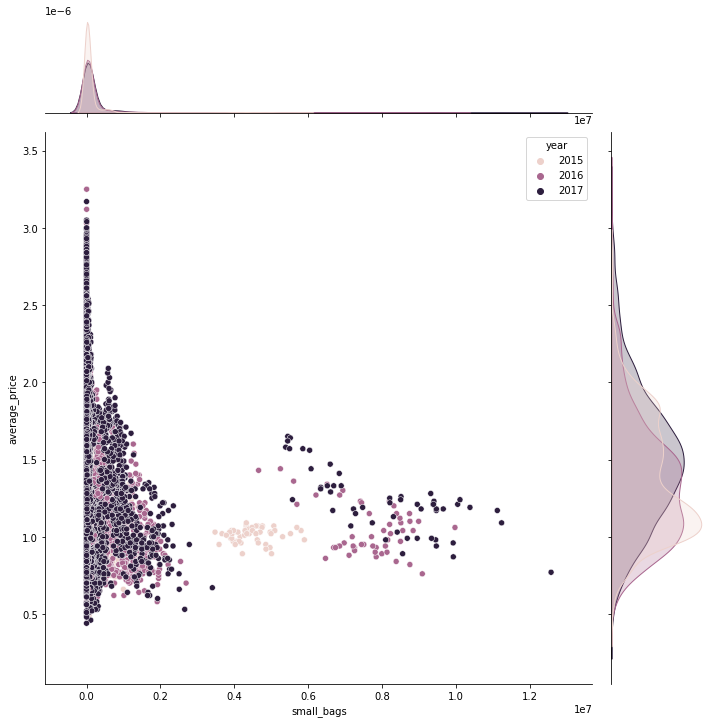

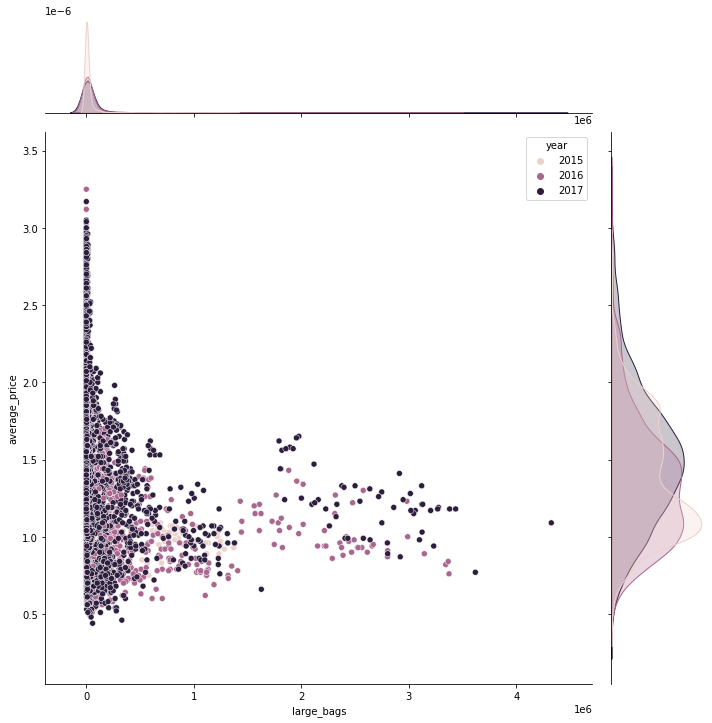

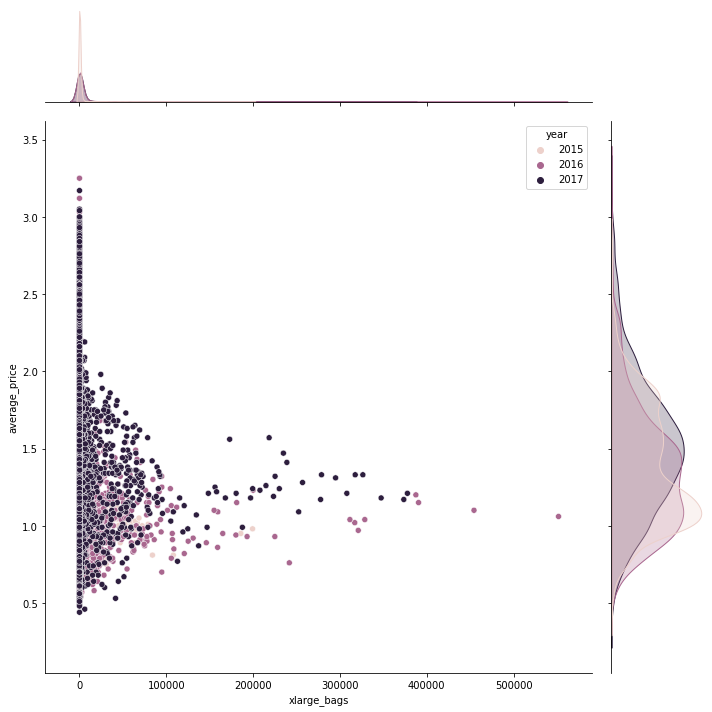

In [241]:
for predictor in predictors:
  sns.jointplot(data=df, x=predictor, y=target, hue=categorial, height=pic_size)
  # sns.displot(data=df, x=predictor, y=target, hue=categorial, height=pic_size)
  # sns.displot(data=df, x=predictor, y=target, kind='kde', hue=categorial, height=pic_size)
  plt.plot()

### Step 2
I need to make an estimation of multivariate mathematical expectation and
variance.

In [242]:
df.mean()

average_price         1.410447
year               2016.006312
total_volume     834109.848000
4046             288244.617776
4225             293665.843429
4770              23233.041193
total_bags       228964.776198
small_bags       174843.949139
large_bags        51202.252266
xlarge_bags        2918.574026
dtype: float64

In [243]:
df.var()

average_price    1.671173e-01
year             6.687308e-01
total_volume     1.143198e+13
4046             1.545792e+12
4225             1.435183e+12
4770             1.191954e+10
total_bags       8.785458e+11
small_bags       5.102487e+11
large_bags       5.118503e+10
xlarge_bags      2.855521e+08
dtype: float64

### Step 3

You need to make a non-parametric estimation of conditional distributions,
mathematical expectations and variances.

+--------------------------------------+
| Mean of variable if year = 2016      |
|    1.3386396011395996                |
| Variance of variable if year = 2016  |
|    0.1550059851385076                |
| Distribution plot:                   |
+--------------------------------------+


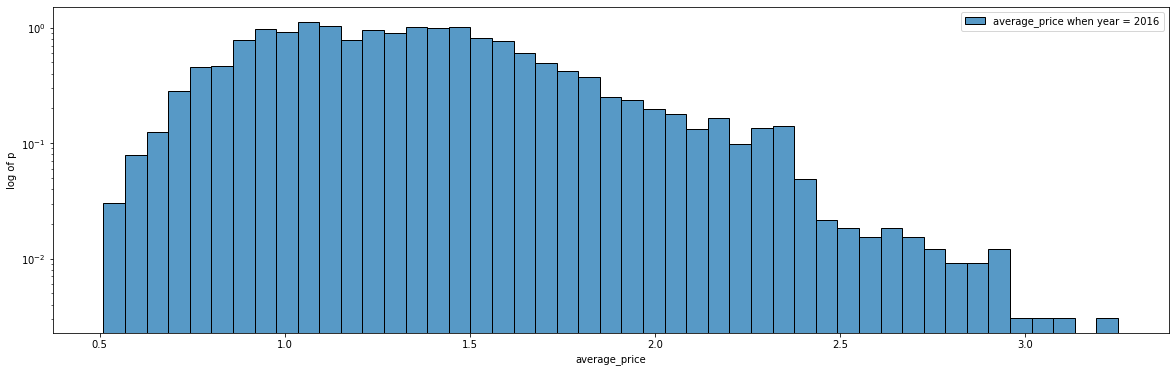

+--------------------------------------+
| Mean of variable if year = 2017      |
|    1.515127577770011                 |
| Variance of variable if year = 2017  |
|    0.1874072988757621                |
| Distribution plot:                   |
+--------------------------------------+


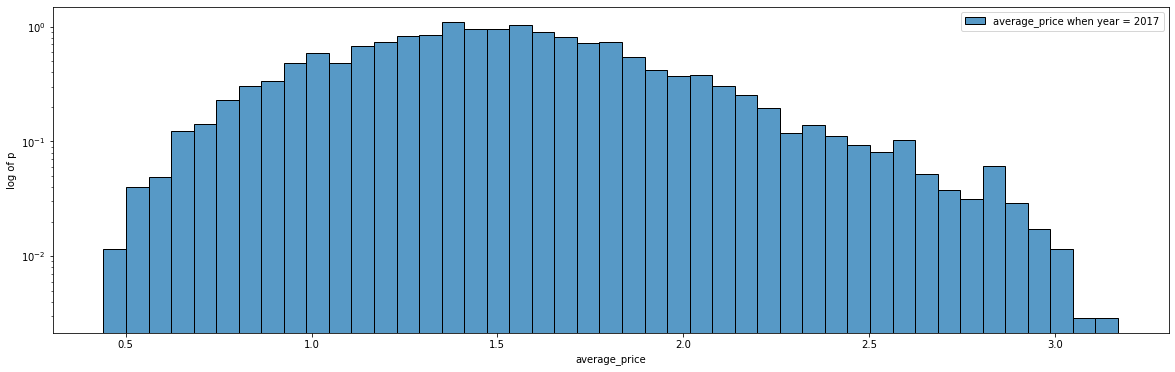

+--------------------------------------+
| Mean of variable if year = 2015      |
|    1.3755903829029397                |
| Variance of variable if year = 2015  |
|    0.14107143175644488               |
| Distribution plot:                   |
+--------------------------------------+


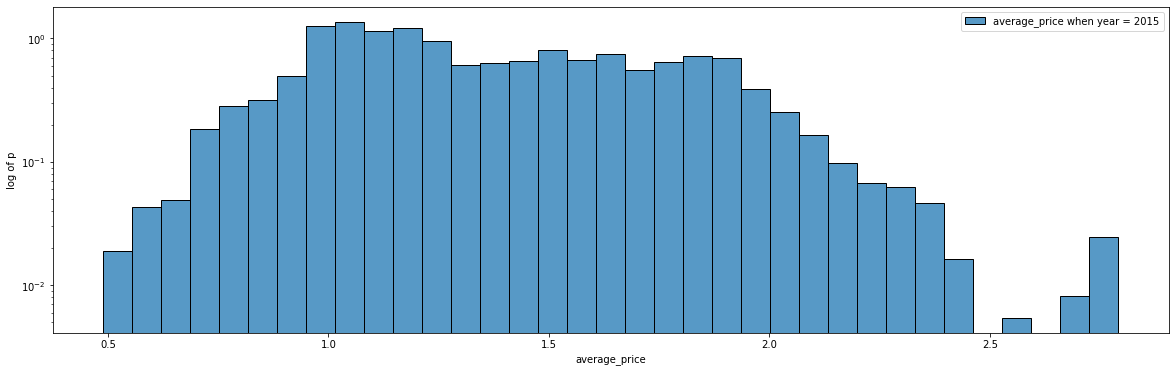

+--------------------------------------+
| Mean of variable if year = 2016      |
|    858420.5647845404                 |
| Variance of variable if year = 2016  |
|    12101575879008.2                  |
| Distribution plot:                   |
+--------------------------------------+


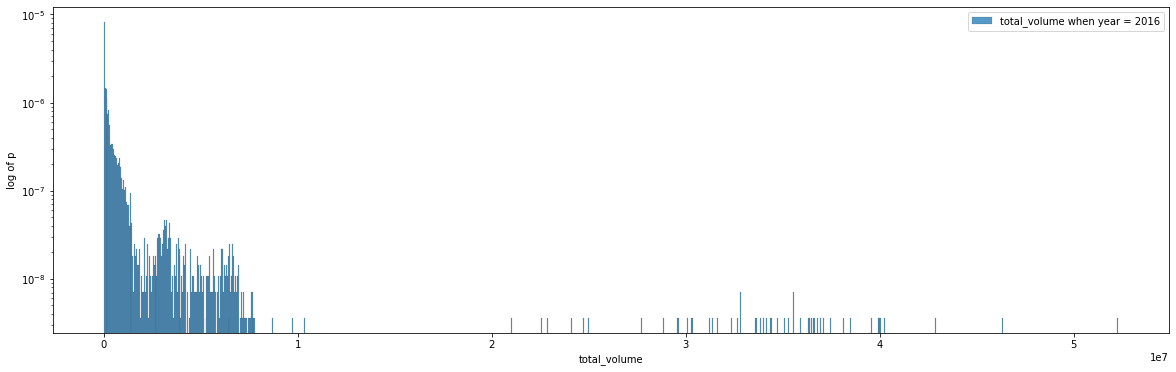

+--------------------------------------+
| Mean of variable if year = 2017      |
|    862339.3392642484                 |
| Variance of variable if year = 2017  |
|    12124027367352.16                 |
| Distribution plot:                   |
+--------------------------------------+


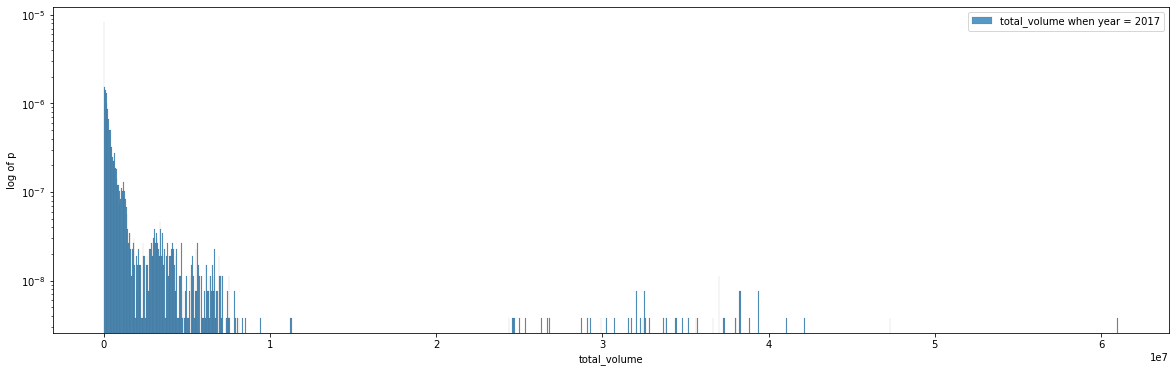

+--------------------------------------+
| Mean of variable if year = 2015      |
|    781027.366347277                  |
| Variance of variable if year = 2015  |
|    10056864000749.59                 |
| Distribution plot:                   |
+--------------------------------------+


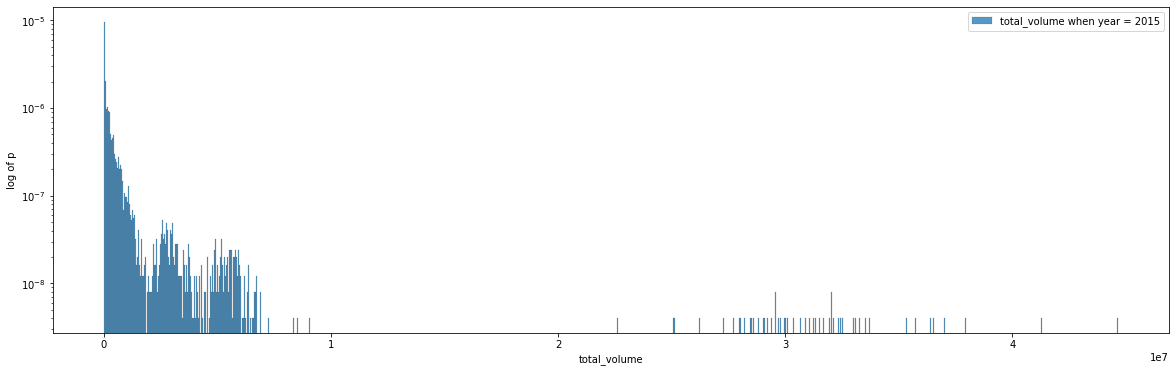

+--------------------------------------+
| Mean of variable if year = 2016      |
|    271567.46657763515                |
| Variance of variable if year = 2016  |
|    1374727456034.9265                |
| Distribution plot:                   |
+--------------------------------------+


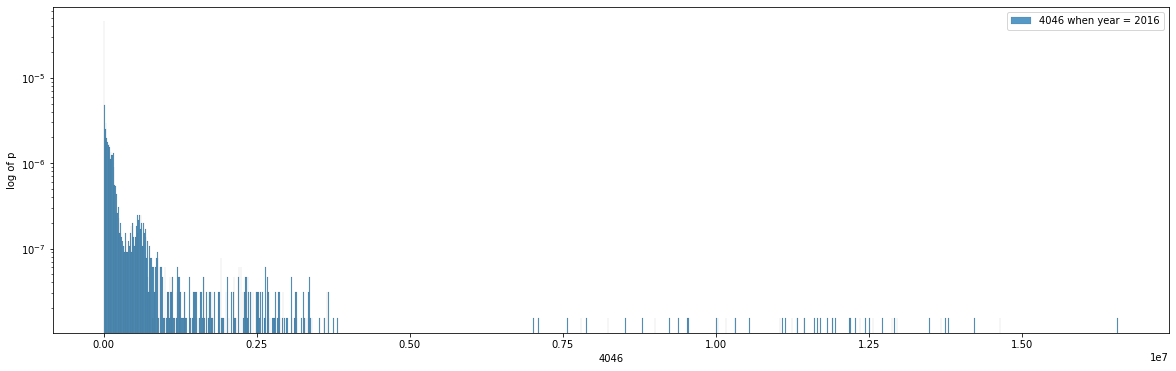

+--------------------------------------+
| Mean of variable if year = 2017      |
|    288716.9051939871                 |
| Variance of variable if year = 2017  |
|    1545847476172.71                  |
| Distribution plot:                   |
+--------------------------------------+


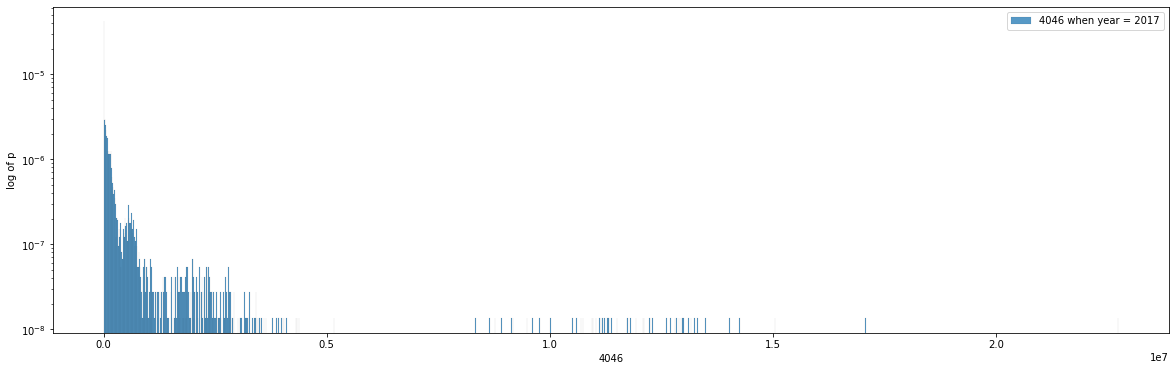

+--------------------------------------+
| Mean of variable if year = 2015      |
|    304443.451707926                  |
| Variance of variable if year = 2015  |
|    1716839111966.685                 |
| Distribution plot:                   |
+--------------------------------------+


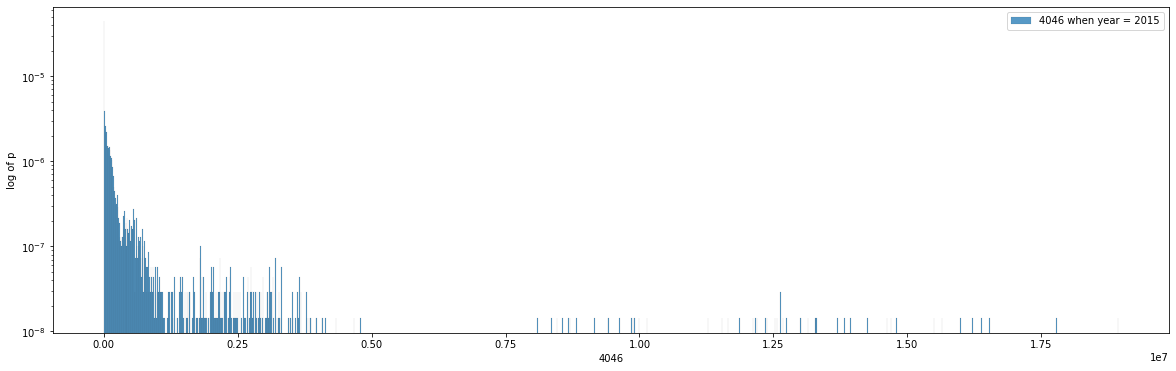

+--------------------------------------+
| Mean of variable if year = 2016      |
|    297850.47863247915                |
| Variance of variable if year = 2016  |
|    1478065535059.2346                |
| Distribution plot:                   |
+--------------------------------------+


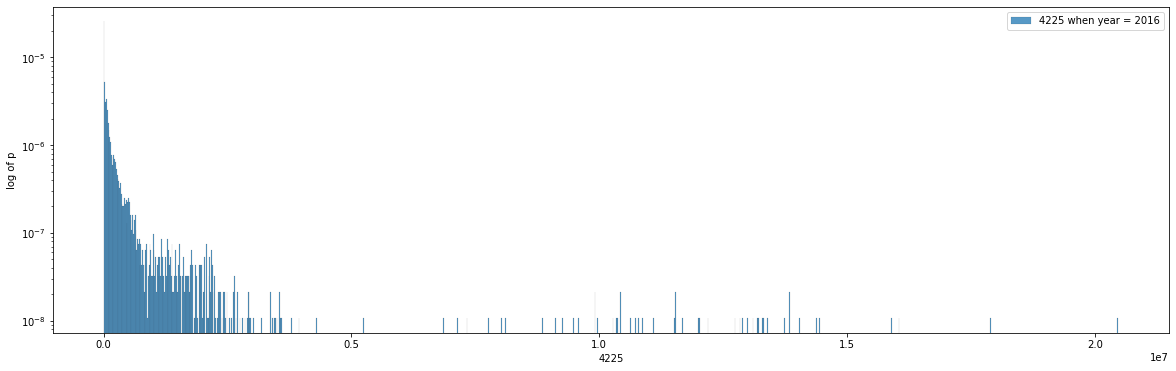

+--------------------------------------+
| Mean of variable if year = 2017      |
|    269964.1243498772                 |
| Variance of variable if year = 2017  |
|    1202042604484.1167                |
| Distribution plot:                   |
+--------------------------------------+


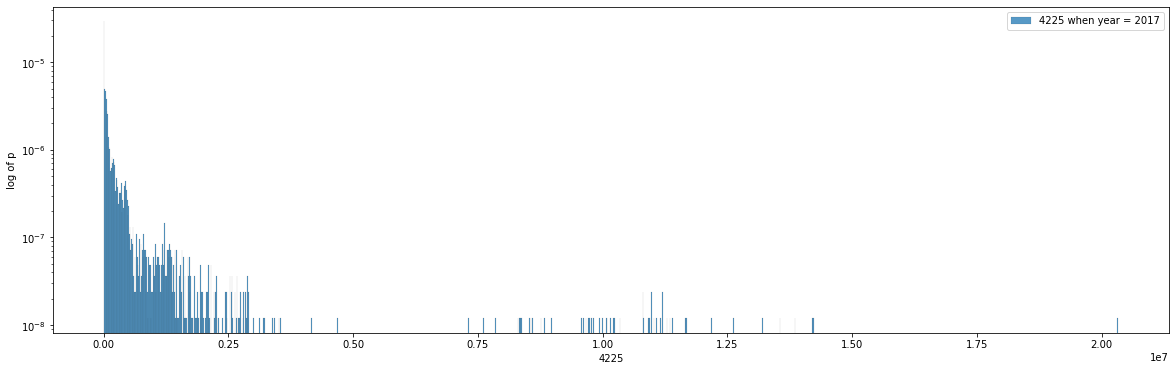

+--------------------------------------+
| Mean of variable if year = 2015      |
|    313633.844366875                  |
| Variance of variable if year = 2015  |
|    1629398194554.395                 |
| Distribution plot:                   |
+--------------------------------------+


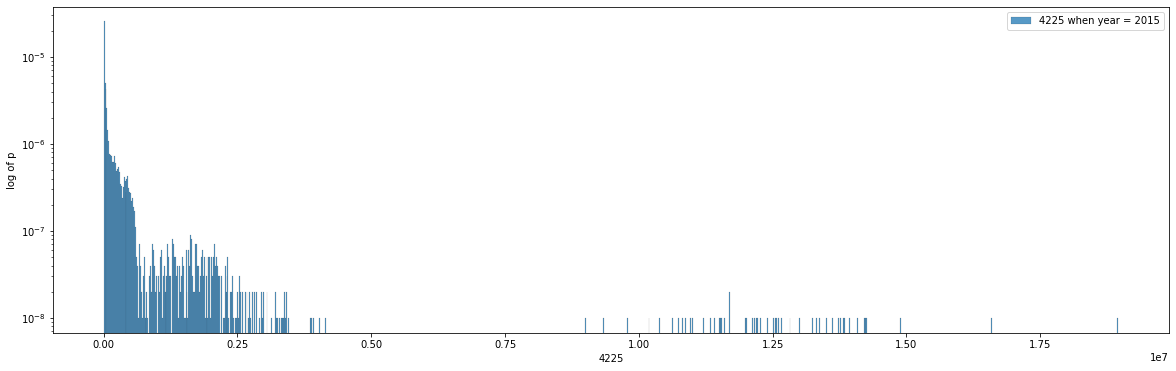

+--------------------------------------+
| Mean of variable if year = 2016      |
|    28468.633370726573                |
| Variance of variable if year = 2016  |
|    18600300656.652557                |
| Distribution plot:                   |
+--------------------------------------+


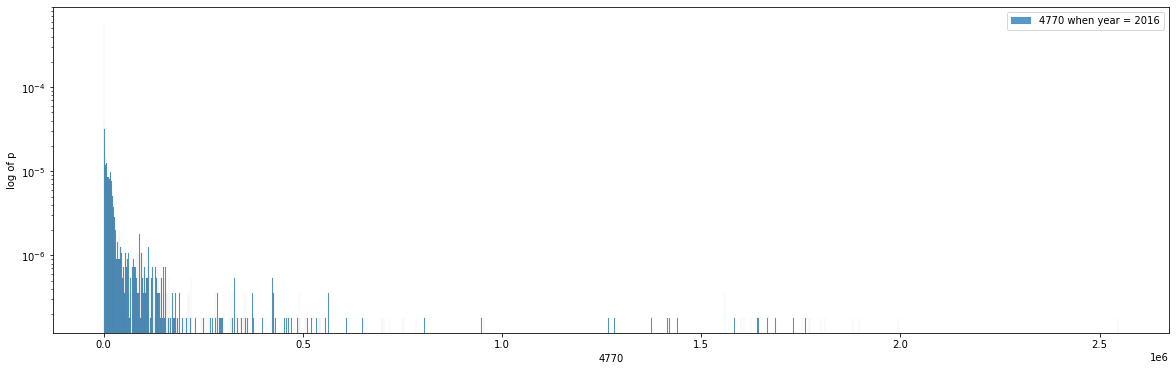

+--------------------------------------+
| Mean of variable if year = 2017      |
|    15941.542778748671                |
| Variance of variable if year = 2017  |
|    5198121233.735787                 |
| Distribution plot:                   |
+--------------------------------------+


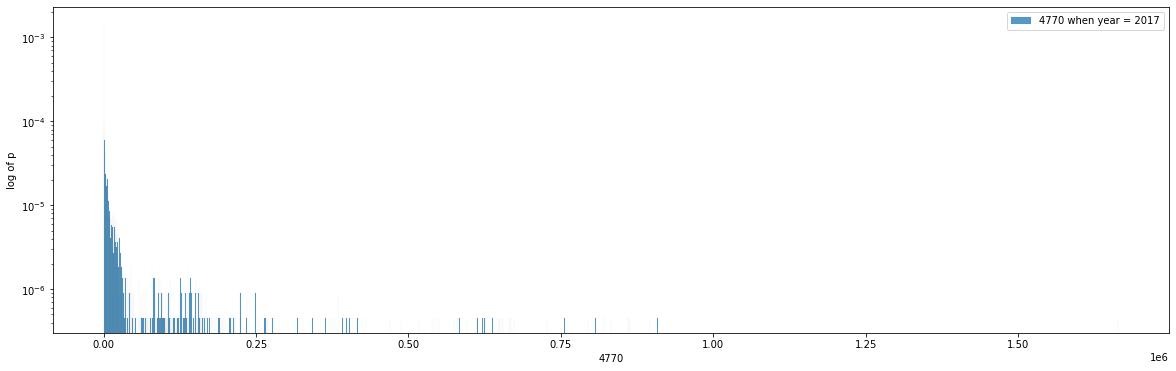

+--------------------------------------+
| Mean of variable if year = 2015      |
|    25426.962520035537                |
| Variance of variable if year = 2015  |
|    12004950392.726713                |
| Distribution plot:                   |
+--------------------------------------+


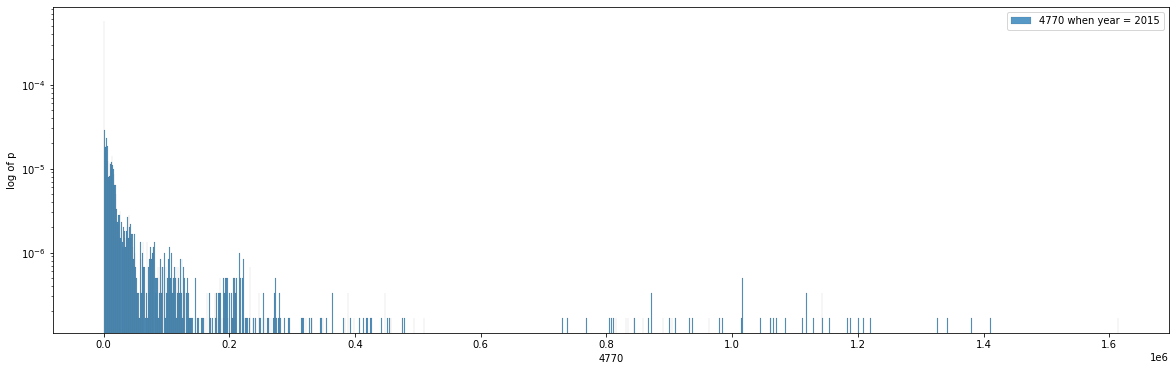

+--------------------------------------+
| Mean of variable if year = 2016      |
|    260533.9862037044                 |
| Variance of variable if year = 2016  |
|    1046507501039.5952                |
| Distribution plot:                   |
+--------------------------------------+


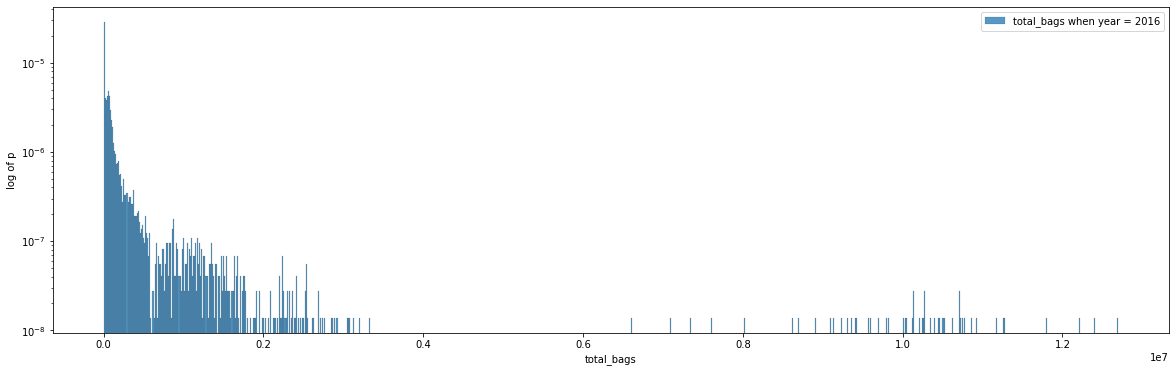

+--------------------------------------+
| Mean of variable if year = 2017      |
|    287712.11942327966                |
| Variance of variable if year = 2017  |
|    1269484482962.5771                |
| Distribution plot:                   |
+--------------------------------------+


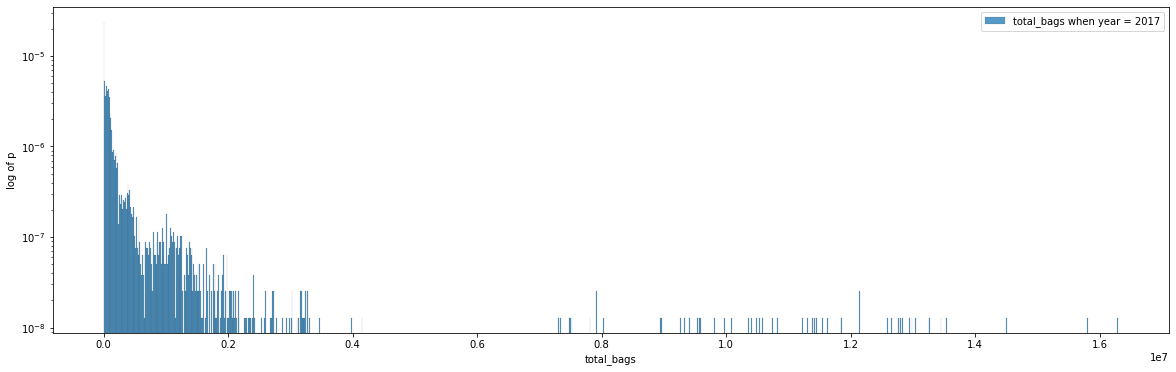

+--------------------------------------+
| Mean of variable if year = 2015      |
|    137523.10543722112                |
| Variance of variable if year = 2015  |
|    299599598598.933                  |
| Distribution plot:                   |
+--------------------------------------+


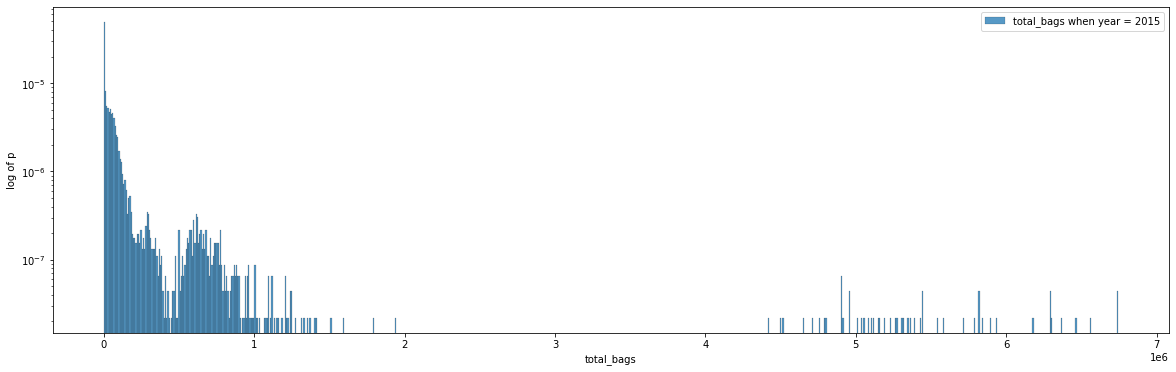

+--------------------------------------+
| Mean of variable if year = 2016      |
|    197025.32756766438                |
| Variance of variable if year = 2016  |
|    608979971759.93                   |
| Distribution plot:                   |
+--------------------------------------+


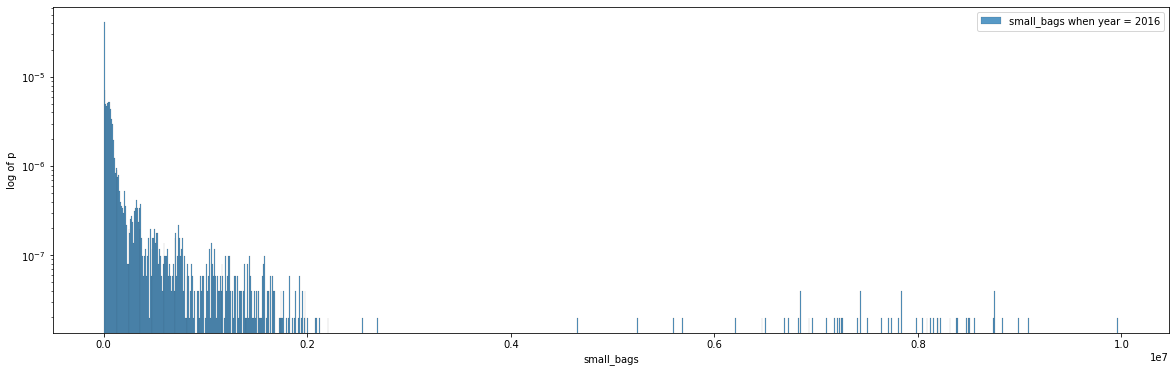

+--------------------------------------+
| Mean of variable if year = 2017      |
|    213728.158837819                  |
| Variance of variable if year = 2017  |
|    706680097789.3496                 |
| Distribution plot:                   |
+--------------------------------------+


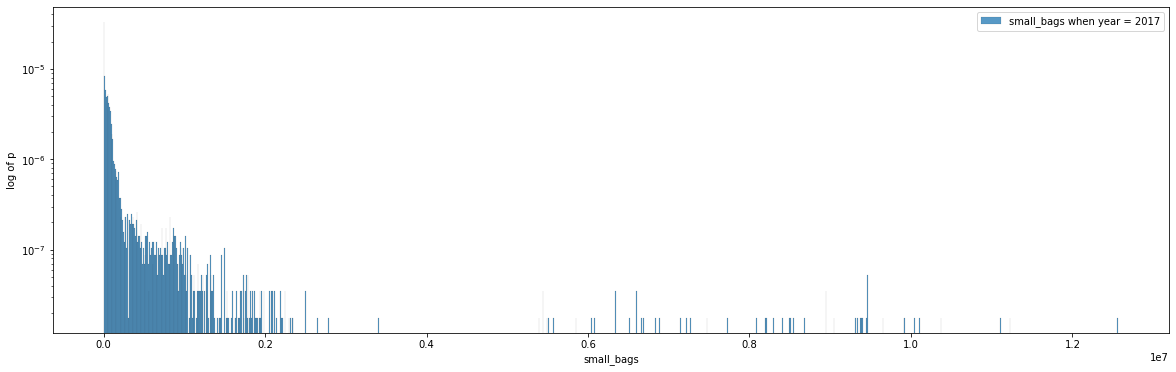

+--------------------------------------+
| Mean of variable if year = 2015      |
|    113033.42925556547                |
| Variance of variable if year = 2015  |
|    205651755106.05148                |
| Distribution plot:                   |
+--------------------------------------+


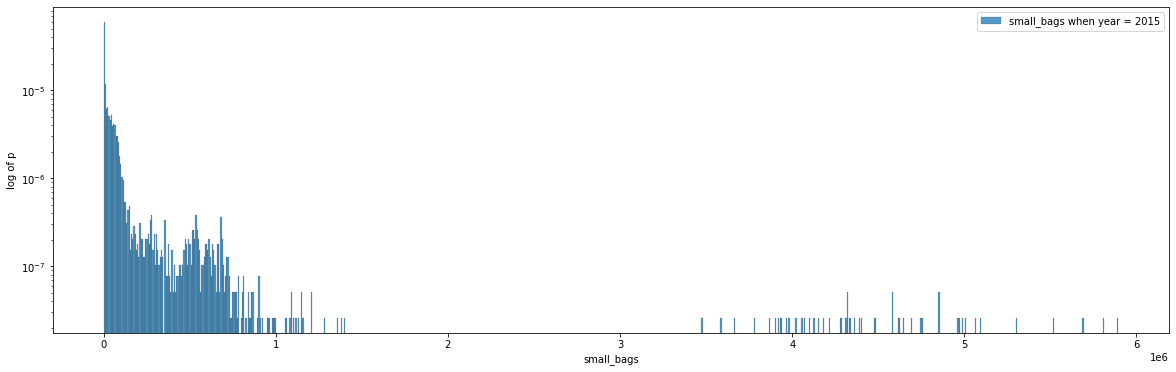

+--------------------------------------+
| Mean of variable if year = 2016      |
|    59940.58797364673                 |
| Variance of variable if year = 2016  |
|    60918608294.8508                  |
| Distribution plot:                   |
+--------------------------------------+


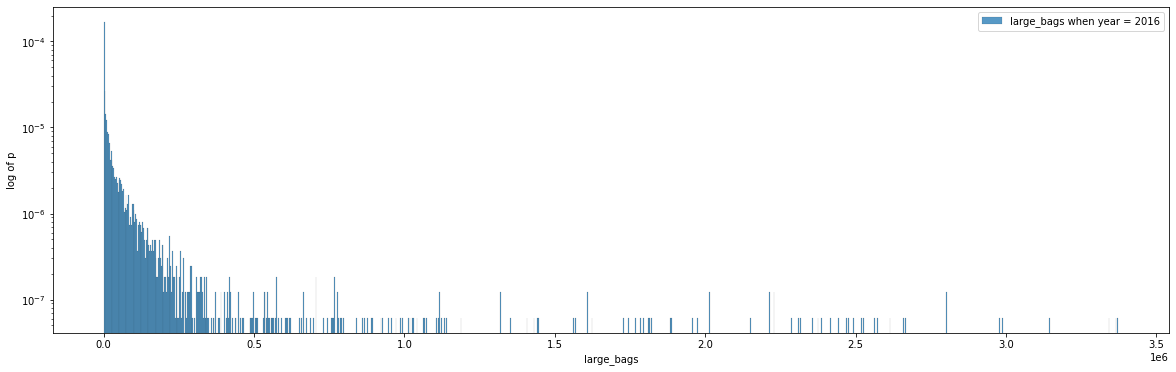

+--------------------------------------+
| Mean of variable if year = 2017      |
|    69790.11536700439                 |
| Variance of variable if year = 2017  |
|    81446111402.52736                 |
| Distribution plot:                   |
+--------------------------------------+


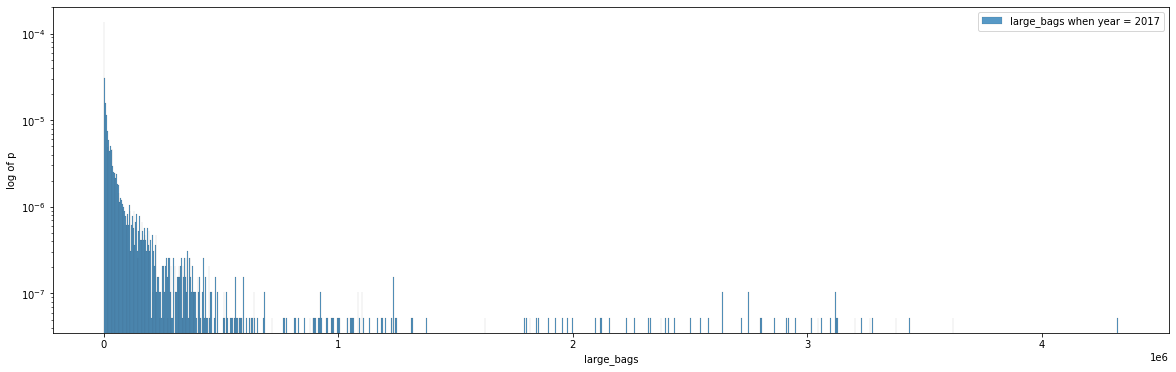

+--------------------------------------+
| Mean of variable if year = 2015      |
|    23520.28503650937                 |
| Variance of variable if year = 2015  |
|    9435132842.57527                  |
| Distribution plot:                   |
+--------------------------------------+


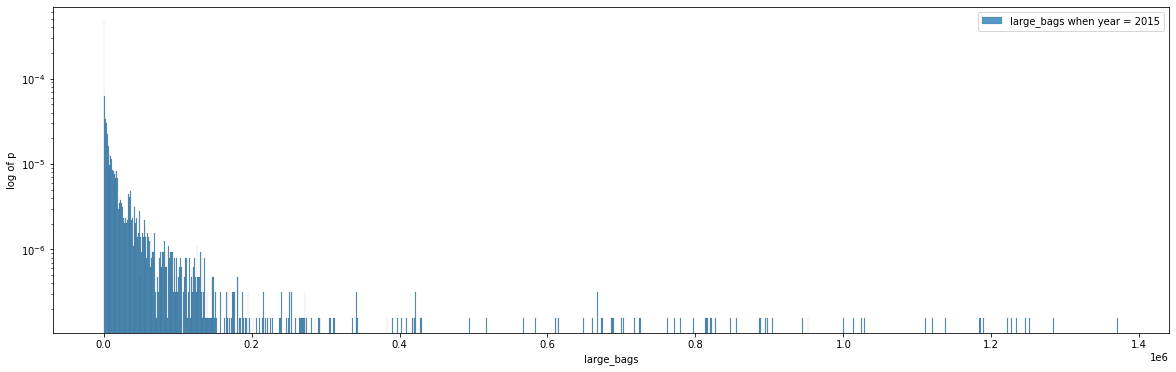

+--------------------------------------+
| Mean of variable if year = 2016      |
|    3568.0706623931655                |
| Variance of variable if year = 2016  |
|    383147368.884189                  |
| Distribution plot:                   |
+--------------------------------------+


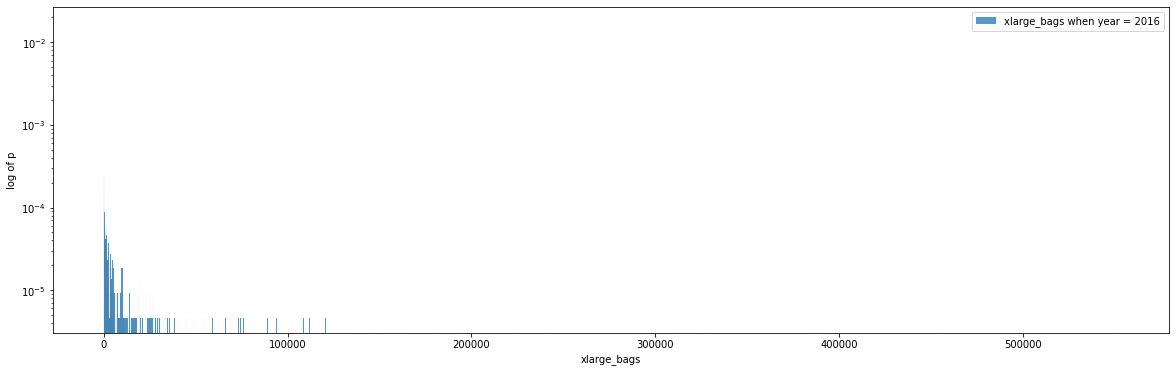

+--------------------------------------+
| Mean of variable if year = 2017      |
|    4193.8434708144                   |
| Variance of variable if year = 2017  |
|    423892131.4627709                 |
| Distribution plot:                   |
+--------------------------------------+


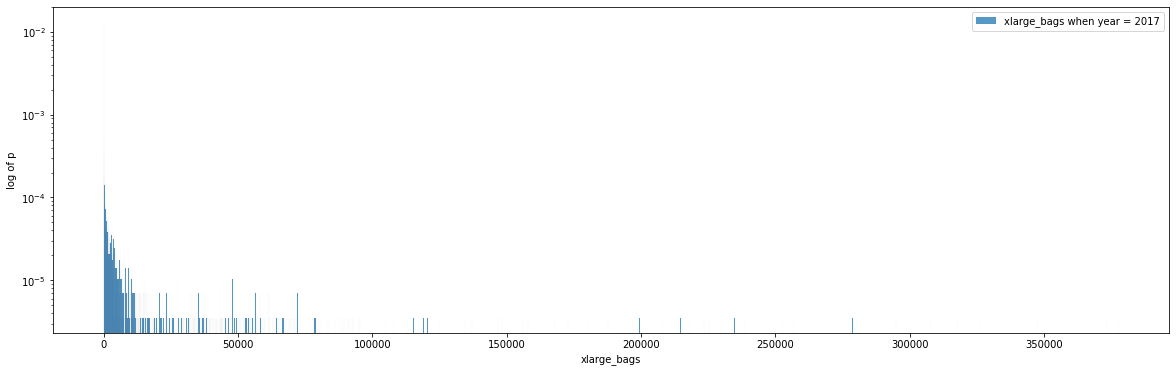

+--------------------------------------+
| Mean of variable if year = 2015      |
|    969.3906108637585                 |
| Variance of variable if year = 2015  |
|    41184761.5027122                  |
| Distribution plot:                   |
+--------------------------------------+


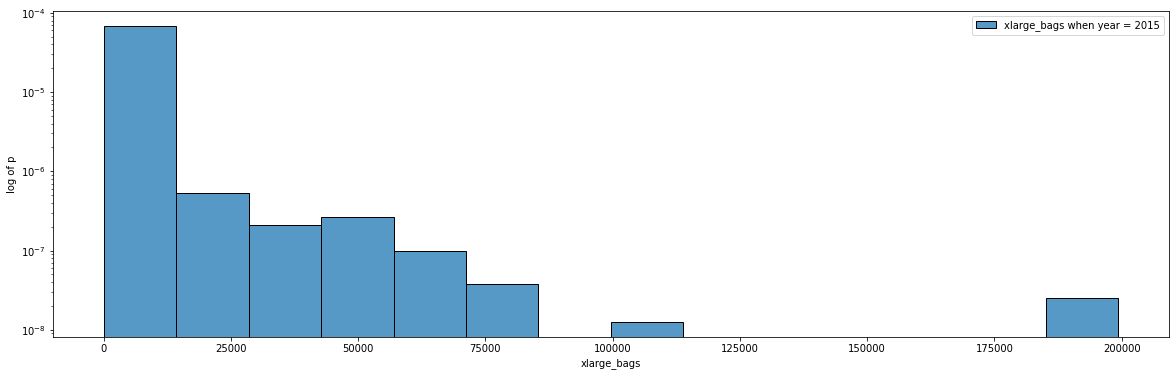

In [244]:
categorials = set(df[categorial])

for variable in [target]+predictors:
  for categorial_val in categorials:
    sample = df[df[categorial] == categorial_val]
    
    text=f"""Mean of variable if {categorial} = {str(categorial_val)}
   {sample.mean()[variable]}
Variance of variable if {categorial} = {str(categorial_val)} 
   {sample.var()[variable]}
Distribution plot:
    """ 
    output = tabulate([[text]], tablefmt='grid')
    print(output)

    plt.figure(figsize=(20, 6))
    min_variable, max_variable = sample[variable].min(), sample[variable].max()
  
    ax = sns.histplot(sample[variable],
                stat="density", 
                label=variable + ' when ' + categorial + ' = ' + str(categorial_val))
    ax.set_yscale("log")
  
    plt.ylabel('log of p')
    plt.legend()
    plt.show()


### Step 4
You need to make an estimation of pair correlation coefficients, confidence intervals
for them and significance levels.

In [245]:
tab = [["Variable", "Target", "Pearson correlation coef", "Significance level", "Confidence interval"]]
for variable in predictors:
  a = 0.05
  r, p = scipy.stats.pearsonr(df[variable], df[target]) # Pearson's r and p from sampled data
  r_z = np.arctanh(r) # Convert r to z’ using Fisher’s z’ transform
  se = 1 / np.sqrt(df[variable].size - 3) # Sample standard error
  z = scipy.stats.norm.ppf(1 - a / 2) # Two-tail test, z - critical
  ci_down_z, ci_up_z = r_z - z * se, r_z + z * se 
  ci_down, ci_up = np.tanh((ci_down_z, ci_up_z))
  tab.append([variable, target, str(r), str(p), f"[{ci_down} ... {ci_up}]"])
print(tabulate(tab, headers="firstrow", tablefmt="grid"))

+--------------+---------------+----------------------------+----------------------+-------------------------------------------------+
| Variable     | Target        |   Pearson correlation coef |   Significance level | Confidence interval                             |
+==============+===============+============================+======================+=================================================+
| total_volume | average_price |                  -0.191748 |         4.14855e-140 | [-0.20620605108236512 ... -0.17720623341969435] |
+--------------+---------------+----------------------------+----------------------+-------------------------------------------------+
| 4046         | average_price |                  -0.206961 |         2.14861e-163 | [-0.22132515098568675 ... -0.1925079133907237]  |
+--------------+---------------+----------------------------+----------------------+-------------------------------------------------+
| 4225         | average_price |                  -0.17

### Step 5
Choose a task formulation for regression. Estimate multivariate correlation (target -
predictors).

Task:

Predict **total_bags** based on *total_volume, year, average price , 4046, 4225, 4770, small_bags, large_bags, xlarge_bags* variables.

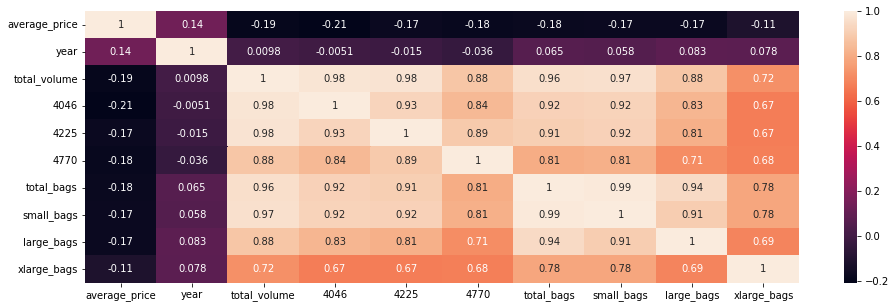

In [246]:
plt.figure(figsize=(16, 5))
sns.heatmap(df.corr(method='pearson'), annot=True)

As we can see, everything is highly correlated with each other. 

Let's apply PCA and see how many variables we need to take for regression.

In [247]:
std_df = scale(df)
std_df = pd.DataFrame(std_df, index=df.index, columns=df.columns)

In [248]:
std_df.head()

,average_price,year,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags
0,-0.196793,-1.230608,-0.227704,-0.231012,-0.199683,-0.212367,-0.235008,-0.232733,-0.225912,-0.172719
1,-0.147868,-1.230608,-0.230473,-0.231303,-0.207877,-0.212274,-0.234145,-0.231607,-0.225893,-0.172719
2,-1.175296,-1.230608,-0.211738,-0.231206,-0.154026,-0.211613,-0.235596,-0.233519,-0.225868,-0.172719
3,-0.808357,-1.230608,-0.223340,-0.230935,-0.185056,-0.212144,-0.238086,-0.236830,-0.225733,-0.172719
4,-0.319106,-1.230608,-0.231608,-0.231088,-0.208545,-0.212114,-0.237689,-0.236397,-0.225450,-0.172719


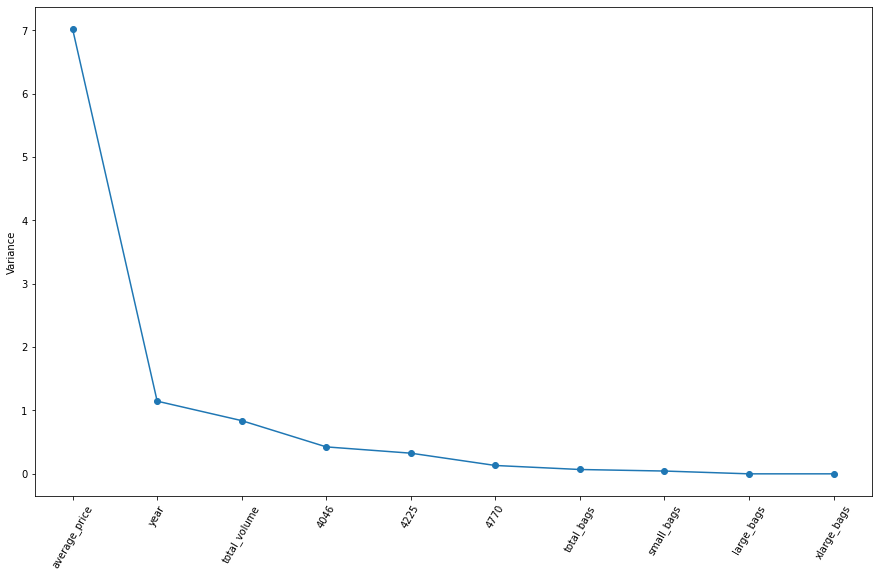

In [249]:
pca = PCA().fit(std_df)
y = np.std(pca.transform(std_df), axis=0)**2
x = np.arange(len(y)) + 1
plt.plot(x, y, "o-")
plt.xticks(x, df.columns, rotation=60)
plt.ylabel("Variance")
plt.show()

Let's take variables **'4046', '4225', '4770',**

### Step 6
Build regression model and make an analysis of multicollinearity and regularization (if
needed).

In [250]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [251]:
df.columns

Index(['average_price', 'year', 'total_volume', '4046', '4225', '4770',
       'total_bags', 'small_bags', 'large_bags', 'xlarge_bags'],
      dtype='object')

In [252]:
train, test = train_test_split(df[['4046', '4225', '4770', 'total_bags']].copy())

predictors = ['4046', '4225', '4770']
target = 'total_bags'
train_X = train[predictors]
train_y = train[target]
test_X = test[predictors]
test_y = test[target]

In [253]:
tab = [["Type", "MSE", "R2", "Coeff - 4046, 4225, 4770"]]

regr = linear_model.LinearRegression()
regr.fit(train_X, train_y)
predicted = regr.predict(test_X)
tab.append(["Least Squares model", str(mean_squared_error(test_y, predicted)), str(r2_score(test_y, predicted)), str(regr.coef_)])

regr = linear_model.Lasso(random_state=1)
regr.fit(train_X, train_y)
predicted = regr.predict(test_X)
tab.append(["Lasso model", str(mean_squared_error(test_y, predicted)), str(r2_score(test_y, predicted)), str(regr.coef_)])

regr = linear_model.Ridge(random_state=1)
regr.fit(train_X, train_y)
predicted = regr.predict(test_X)
tab.append(["Ridge model", str(mean_squared_error(test_y, predicted)), str(r2_score(test_y, predicted)), str(regr.coef_)])

print(tabulate(tab, headers="firstrow", tablefmt="grid"))

+---------------------+-------------+----------+---------------------------------------+
| Type                |         MSE |       R2 | Coeff - 4046, 4225, 4770              |
+=====================+=============+==========+=======================================+
| Least Squares model | 1.55847e+11 | 0.846425 | [ 0.40215175  0.38285459 -0.56140813] |
+---------------------+-------------+----------+---------------------------------------+
| Lasso model         | 1.55847e+11 | 0.846425 | [ 0.40215175  0.38285459 -0.56140813] |
+---------------------+-------------+----------+---------------------------------------+
| Ridge model         | 1.55847e+11 | 0.846425 | [ 0.40215175  0.38285459 -0.56140813] |
+---------------------+-------------+----------+---------------------------------------+


All three models showed similar results.

### Step 7
Analyze the quality of regression model (distribution of residuals, determination
coefficient).

In [254]:
model = linear_model.LinearRegression()
model.fit(train_X, train_y)
predicted = model.predict(test_X)
print(tabulate([["Type", "MSE", "R2", "Coeff - 4046, 4225, 4770"],
                ["Least Squares model", str(mean_squared_error(test_y, predicted)), str(r2_score(test_y, predicted)), str(model.coef_)]], 
               tablefmt="grid"))


+---------------------+--------------------+--------------------+---------------------------------------+
| Type                | MSE                | R2                 | Coeff - 4046, 4225, 4770              |
+---------------------+--------------------+--------------------+---------------------------------------+
| Least Squares model | 155846651763.88666 | 0.8464254746012203 | [ 0.40215175  0.38285459 -0.56140813] |
+---------------------+--------------------+--------------------+---------------------------------------+


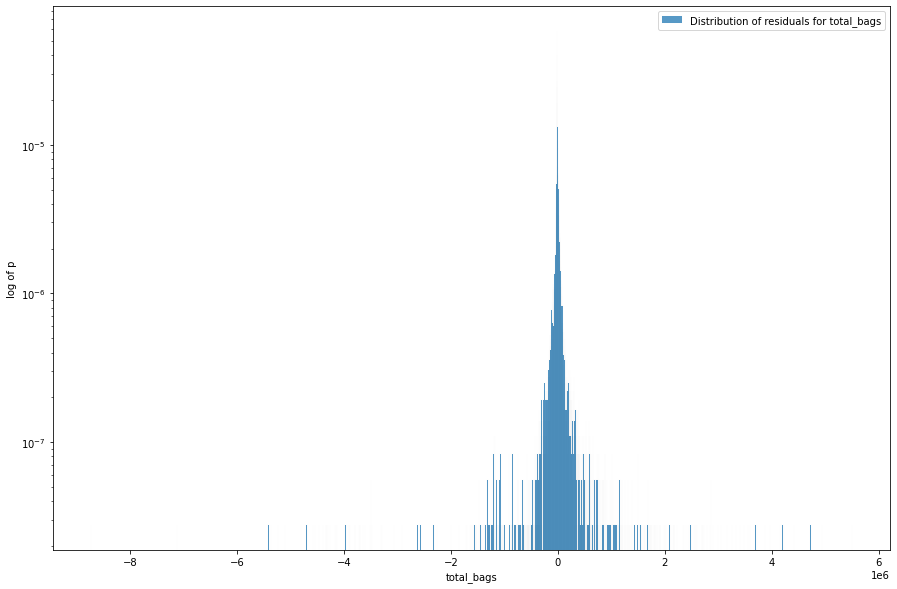

In [255]:
residuals = df[target] - model.predict(df[predictors])
plt.figure(figsize=(15, 10))   
ax = sns.histplot(residuals, stat="density", label=f'Distribution of residuals for {target}')
ax.set_yscale("log")
plt.ylabel('log of p')
plt.legend()
plt.show()

In [256]:
residuals.describe()

count    1.695300e+04
mean    -2.098824e+03
std      3.455356e+05
min     -8.727265e+06
25%     -1.849128e+04
50%     -1.248289e+04
75%      9.020759e+03
max      5.494585e+06
Name: total_bags, dtype: float64

In [258]:
result = scipy.stats.anderson(residuals, dist='norm')
print('Statistic: %.3f' % result.statistic)
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.1f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.1f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 3650.113
15.0: 0.576, data does not look normal (reject H0)
10.0: 0.656, data does not look normal (reject H0)
5.0: 0.787, data does not look normal (reject H0)
2.5: 0.918, data does not look normal (reject H0)
1.0: 1.092, data does not look normal (reject H0)


In [266]:
scipy.stats.kstest(residuals, 'norm',args=(residuals.mean(), residuals.var()))

KstestResult(statistic=0.4999816335444054, pvalue=0.0)

Residuals are not distributed normally.

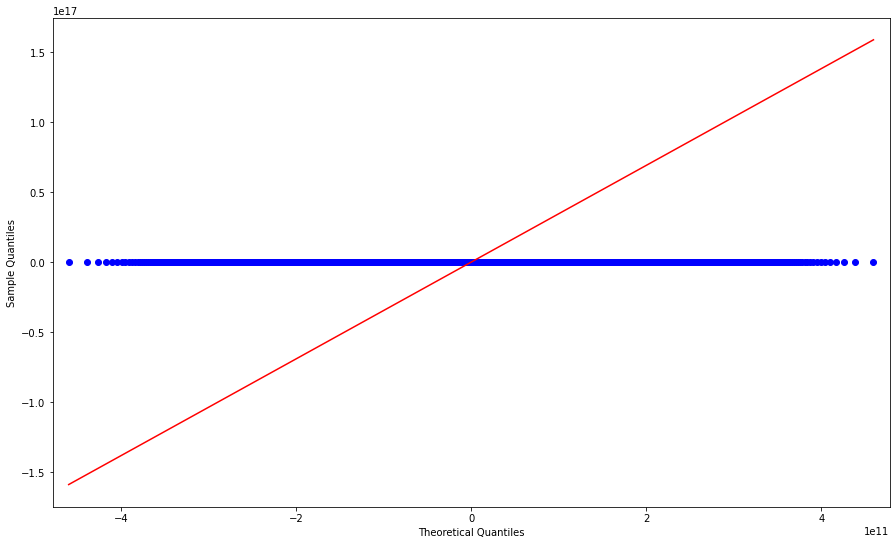

In [279]:
import pylab 
import statsmodels.api as sm

sm.qqplot(residuals, loc=residuals.mean(), scale=residuals.var(), line='s')
pylab.show()